In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import requests
from io import StringIO
import re

In [2]:
url = 'https://drive.google.com/file/d/1GGXlVpkMXO6bDZn8R2PSHIjlqCNf7IBw/view?usp=sharing'
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
total_fires = pd.read_csv(path)

In [3]:
url = 'https://drive.google.com/file/d/1JwmTV_2g__N-DQzKdx3IjKQyRw5mbDTB/view?usp=sharing'
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
total_area = pd.read_csv(path)

In [4]:
total_fires.set_index('year', inplace=True)

In [5]:
total_fires.head(1)

,negligence,stroke of lightning,arson,others,unknown cause,total number of fires
year,,,,,,
1991,395,11,460,333,647,1846


In [6]:
total_area.head(1)

,year,negligence,stroke of lightning,arson,others,unknown cause,total burnt area
0,1991,244.5,3.6,127.0,309.1,235.5,919.7


In [7]:
total_area.set_index('year', inplace=True)

In [8]:
total_fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   negligence             32 non-null     int64
 1   stroke of lightning    32 non-null     int64
 2   arson                  32 non-null     int64
 3   others                 32 non-null     int64
 4   unknown cause          32 non-null     int64
 5   total number of fires  32 non-null     int64
dtypes: int64(6)
memory usage: 1.8 KB


In [9]:
total_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   negligence           32 non-null     float64
 1   stroke of lightning  32 non-null     float64
 2   arson                32 non-null     float64
 3   others               32 non-null     float64
 4   unknown cause        32 non-null     float64
 5   total burnt area     32 non-null     float64
dtypes: float64(6)
memory usage: 1.8 KB


In [11]:
#from google.colab import files

#total_fires.to_csv('total_fires.csv', index=False)
#files.download('total_fires.csv')

#total_fires.to_csv('total_area.csv', index=False)
#files.download('total_area.csv')

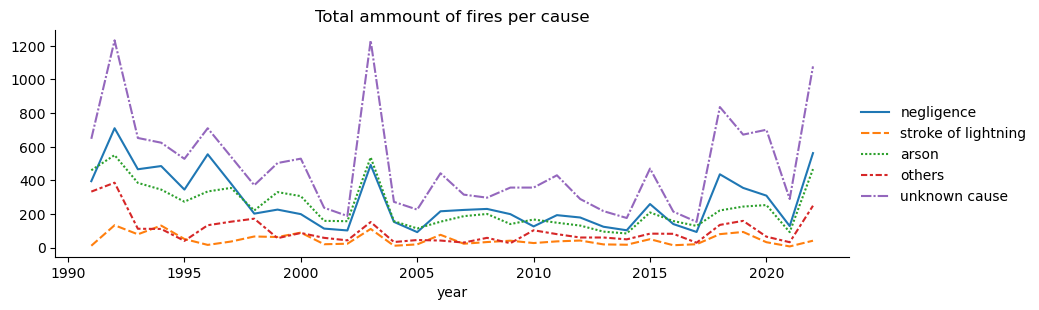

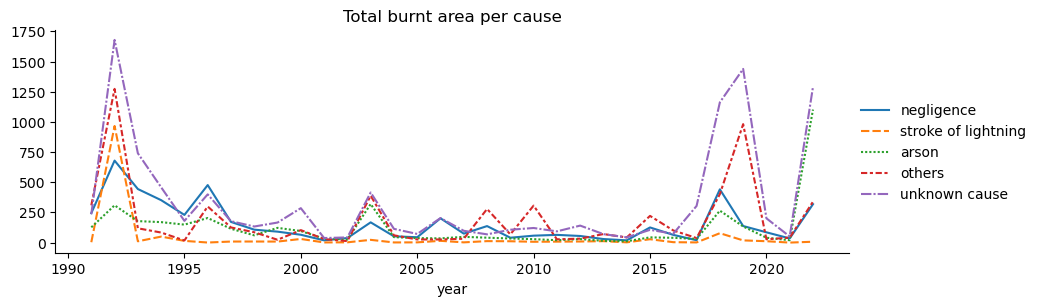

In [12]:
sns.relplot(data = total_fires.iloc[:, 0:5], kind = "line", height = 3, aspect = 3);
plt.title('Total ammount of fires per cause')

sns.relplot(data = total_area.iloc[:, 0:5], kind = "line", height = 3, aspect = 3);
plt.title('Total burnt area per cause')
plt.show()

In [13]:
# to check if the total numbers are correct - in the case of total fires is ok

total_fires['total number of fires'].sum() == (total_fires['negligence'].sum() + total_fires['stroke of lightning'].sum()
                                             + total_fires['arson'].sum() + total_fires['others'].sum() + total_fires['unknown cause'].sum())

True

In [14]:
# the total burnt area wasn't correct so we sum all the columns per row to get the total

total_area['total burnt area'] = (total_area['negligence'] + total_area['stroke of lightning'] + total_area['arson'] + total_area['others'] + total_area['unknown cause'])

In [15]:
# still the comparison was 'False' but apparently it was due to decimals

In [16]:
# if we compare the sums we can see it is also correct

(total_area['negligence'].sum() + total_area['stroke of lightning'].sum()
                                             + total_area['arson'].sum() + total_area['others'].sum() + total_area['unknown cause'].sum())

27114.09

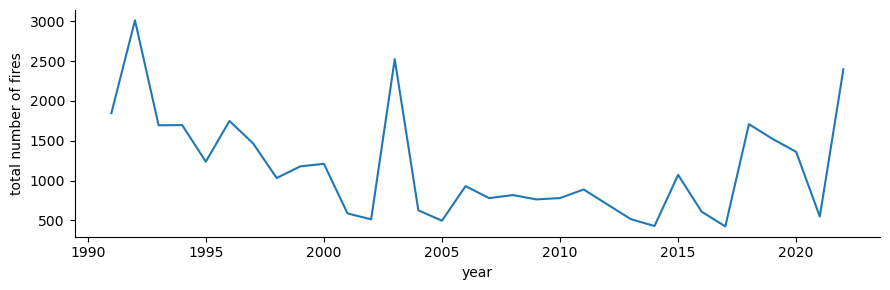

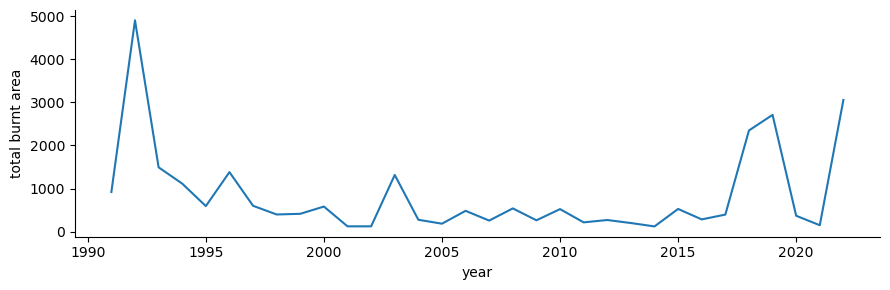

In [17]:
# now we can compare the total burnt area vs the total number of fires per year
sns.relplot(data = total_fires.iloc[:, -1], kind = "line", height = 3, aspect = 3);
sns.relplot(data = total_area.iloc[:, -1], kind = "line", height = 3, aspect = 3);

Lets get some weather data!

In [18]:
table_url = "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/air_temperature_mean/regional_averages_tm_year.txt"
response = requests.get(table_url)

if response.status_code == 200:
    table_data = response.text
    # Now you can process the table_data variable as needed
else:
    print("Failed to retrieve the table data. Status code:", response.status_code)

In [19]:
table_data

'Zeitreihen fuer Gebietsmittel fuer Bundeslaender und Kombinationen von Bundeslaender, erstellt am: 20231002\r\nJahr;Jahr;Brandenburg/Berlin;Brandenburg;Baden-Wuerttemberg;Bayern;Hessen;Mecklenburg-Vorpommern;Niedersachsen;Niedersachsen/Hamburg/Bremen;Nordrhein-Westfalen;Rheinland-Pfalz;Schleswig-Holstein;Saarland;Sachsen;Sachsen-Anhalt;Thueringen/Sachsen-Anhalt;Thueringen;Deutschland;\r\n1881;year;     7.55;     7.54;     7.66;     6.61;     7.49;     6.96;     7.54;     7.54;     8.14;     7.97;     7.12;     8.28;     6.71;     7.46;     7.11;     6.66;     7.31;\r\n1882;year;     8.99;     8.97;     8.08;     7.33;     8.25;     8.54;     8.88;     8.88;     9.03;     8.55;     8.78;     8.79;     8.12;     8.81;     8.35;     7.77;     8.34;\r\n1883;year;     8.42;     8.41;     7.77;     6.85;     7.96;     7.95;     8.39;     8.39;     8.71;     8.26;     8.18;     8.51;     7.46;     8.32;     7.87;     7.31;     7.88;\r\n1884;year;     9.11;     9.10;     8.44;     7.52;     8

In [20]:
# Create a StringIO object to simulate a file-like object
table_io = StringIO(table_data)

# Read the data into a Pandas data frame
df = pd.read_csv(table_io, sep=';', skiprows=2)

# Set the column names based on the header row
header = table_data.split('\n')[1].strip().split(';')
df.columns = header

# Optionally, set the index column (e.g., 'Jahr' in this case)
df.set_index('Jahr', inplace=True)

# create data frame
mean_temp = pd.DataFrame(df)

In [21]:
mean_temp.head(1)

,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,
Jahr,,,,,,,,,,,,,,,,,,
"(1882, year)",8.99,8.97,8.08,7.33,8.25,8.54,8.88,8.88,9.03,8.55,8.78,8.79,8.12,8.81,8.35,7.77,8.34,NaN


In [22]:
# we still have an empty column so we delete it

mean_temp = mean_temp.drop(columns=[''])

In [23]:
mean_temp.columns

Index(['Brandenburg/Berlin', 'Brandenburg', 'Baden-Wuerttemberg', 'Bayern',
       'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Niedersachsen/Hamburg/Bremen', 'Nordrhein-Westfalen',
       'Rheinland-Pfalz', 'Schleswig-Holstein', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Thueringen/Sachsen-Anhalt', 'Thueringen',
       'Deutschland'],
      dtype='object')

In [24]:
# we check with .info() and see that there is no missing data and that the data types are correct

mean_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, (1882, 'year') to (2022, 'year')
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brandenburg/Berlin            141 non-null    float64
 1   Brandenburg                   141 non-null    float64
 2   Baden-Wuerttemberg            141 non-null    float64
 3   Bayern                        141 non-null    float64
 4   Hessen                        141 non-null    float64
 5   Mecklenburg-Vorpommern        141 non-null    float64
 6   Niedersachsen                 141 non-null    float64
 7   Niedersachsen/Hamburg/Bremen  141 non-null    float64
 8   Nordrhein-Westfalen           141 non-null    float64
 9   Rheinland-Pfalz               141 non-null    float64
 10  Schleswig-Holstein            141 non-null    float64
 11  Saarland                      141 non-null    float64
 12  Sachsen                       141 non-null   

In [25]:
# we reset the index and change the column name to 'year'
mean_temp.reset_index(inplace=True)
mean_temp.rename(columns={'Jahr': 'year'}, inplace=True)

In [26]:
mean_temp.head(1)

,year,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
0,"(1882, year)",8.99,8.97,8.08,7.33,8.25,8.54,8.88,8.88,9.03,8.55,8.78,8.79,8.12,8.81,8.35,7.77,8.34


In [27]:
mean_temp.iloc[1, 0]

(1883, 'year')

In [28]:
# to fix the year

string = str(mean_temp.iloc[1, 0])
string
string.replace('(', '').replace(", 'year')", '')

'1883'

In [29]:
# we use a for loop to go through each row

for i in range(len(mean_temp)):
  string = str(mean_temp.iloc[i, 0])
  string = string.replace('(', '').replace(", 'year')", '')
  mean_temp.iloc[i, 0] = string

In [30]:
mean_temp['year'].head(1)

0    1882
Name: year, dtype: object

In [31]:
# we change the year back to the index

mean_temp.set_index('year', inplace=True)

In [32]:
mean_temp.query('year == "2010"')

,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
year,,,,,,,,,,,,,,,,,
2010,8.09,8.08,7.93,7.34,7.9,7.69,8.11,8.11,8.43,8.37,7.67,8.71,7.46,7.99,7.64,7.2,7.85


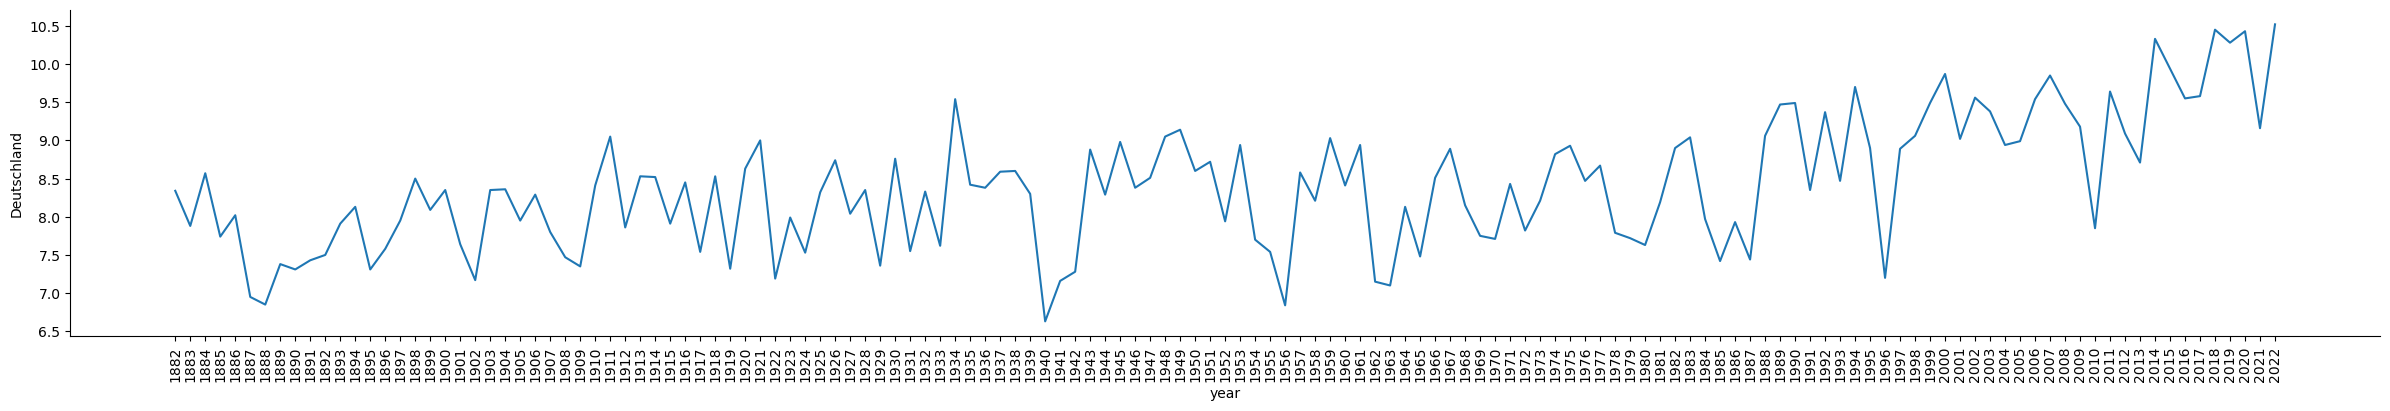

In [33]:
# now we can plot the temperature per year since 1882

sns.relplot(data = mean_temp.iloc[:, -1], kind = "line", height = 4, aspect = 6);
plt.xticks(rotation=90)
plt.show()

In [34]:
# we can create a function with the previous steps for other datasets

def get_table_data(table_url):

  response = requests.get(table_url)

  if response.status_code == 200:
      table_data = response.text
      # Now you can process the table_data variable as needed
  else:
      print("Failed to retrieve the table data. Status code:", response.status_code)

  # Create a StringIO object to simulate a file-like object
  table_io = StringIO(table_data)

  # Read the data into a Pandas data frame
  df = pd.read_csv(table_io, sep=';', skiprows=2)

  # Set the column names based on the header row
  header = table_data.split('\n')[1].strip().split(';')
  df.columns = header

  new_column_names = {df.columns[0]: 'year'}
  df.rename(columns=new_column_names, inplace=True)
  df.drop(columns=[''], inplace=True)
  df.set_index('year', inplace=True)
  df.reset_index(inplace=True)

  for i in range(len(df)):
    string = str(df.iloc[i, 0])
    string = string.replace('(', '').replace(", 'year')", '')
    df.iloc[i, 0] = string

  df.set_index('year', inplace=True)

  return df

In [35]:
table_url = "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/precipitation/regional_averages_rr_year.txt"

mean_rain = get_table_data(table_url)
mean_rain.head(1)

,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
year,,,,,,,,,,,,,,,,,
1882,673.6,673.0,1255.2,1085.3,1005.1,568.5,758.8,757.3,1032.1,1078.9,785.4,1210.3,952.3,666.8,762.3,882.4,926.7


In [36]:
mean_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 1882 to 2022
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brandenburg/Berlin            141 non-null    float64
 1   Brandenburg                   141 non-null    float64
 2   Baden-Wuerttemberg            141 non-null    float64
 3   Bayern                        141 non-null    float64
 4   Hessen                        141 non-null    float64
 5   Mecklenburg-Vorpommern        141 non-null    float64
 6   Niedersachsen                 141 non-null    float64
 7   Niedersachsen/Hamburg/Bremen  141 non-null    float64
 8   Nordrhein-Westfalen           141 non-null    float64
 9   Rheinland-Pfalz               141 non-null    float64
 10  Schleswig-Holstein            141 non-null    float64
 11  Saarland                      141 non-null    float64
 12  Sachsen                       141 non-null    float64
 13  Sachse

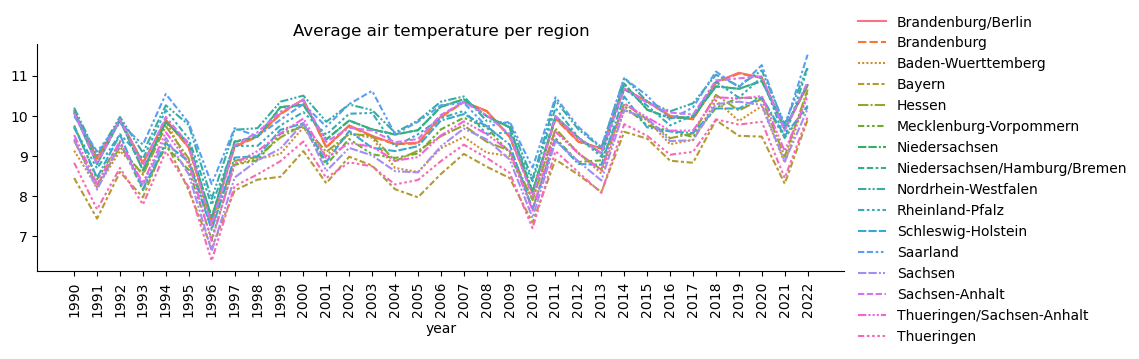

In [37]:
# avg air temp per year per region
sns.relplot(data = mean_temp.iloc[108:, :-1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Average air temperature per region")
plt.show()

In [38]:
# summer days
table_url = "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/summer_days/regional_averages_txas_year.txt"
summer_days = get_table_data(table_url)

# tropical nights
table_url = "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/tropical_nights_tminGE20/regional_averages_tnes_year.txt"
tropical_nights = get_table_data(table_url)

# hot days
table_url = "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/hot_days/regional_averages_txbs_year.txt"
hot_days = get_table_data(table_url)

In [39]:
display(summer_days.head(1))
display(tropical_nights.head(1))
display(hot_days.head(1))

,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
year,,,,,,,,,,,,,,,,,
1952,34.57,34.49,43.11,39.09,32.6,15.08,19.93,19.87,24.63,33.9,9.71,33.49,35.86,32.37,32.1,31.75,30.7


,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
year,,,,,,,,,,,,,,,,,
1952,0.2,0.21,1.24,0.74,1.74,0.0,0.03,0.03,1.02,2.69,0.0,3.62,1.0,0.18,0.25,0.34,0.75


,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
year,,,,,,,,,,,,,,,,,
1952,5.46,5.48,14.31,12.27,10.37,1.64,2.55,2.52,6.71,10.95,0.82,11.69,8.81,5.57,6.64,8.03,7.91


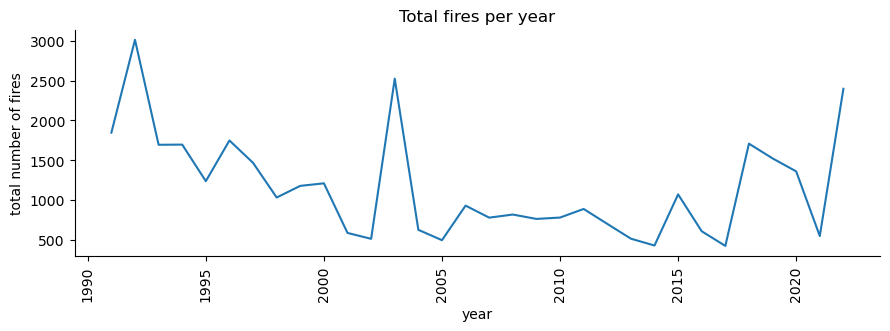

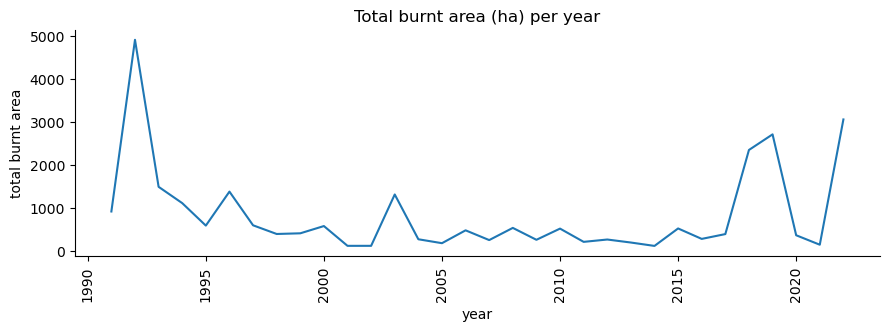

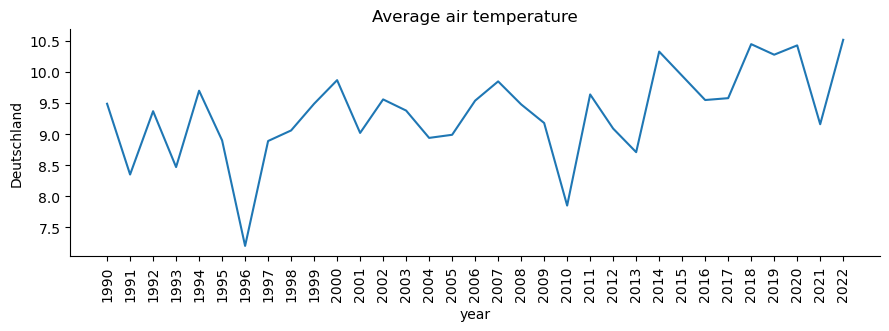

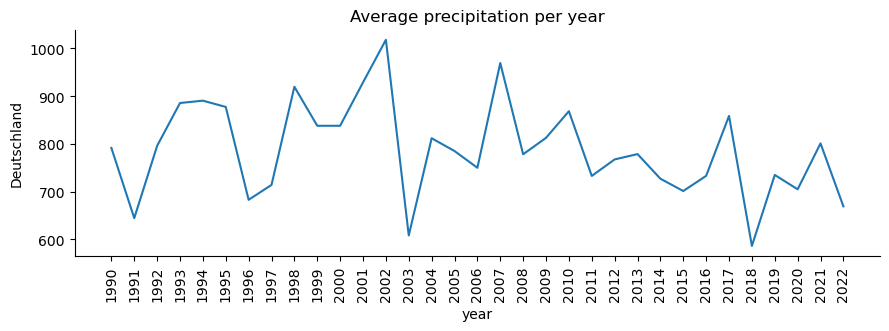

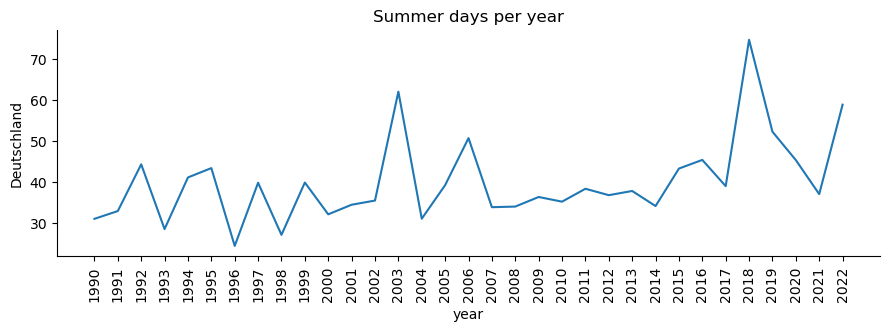

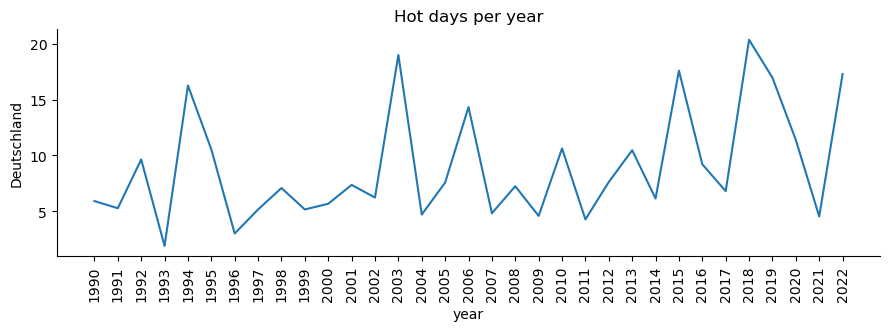

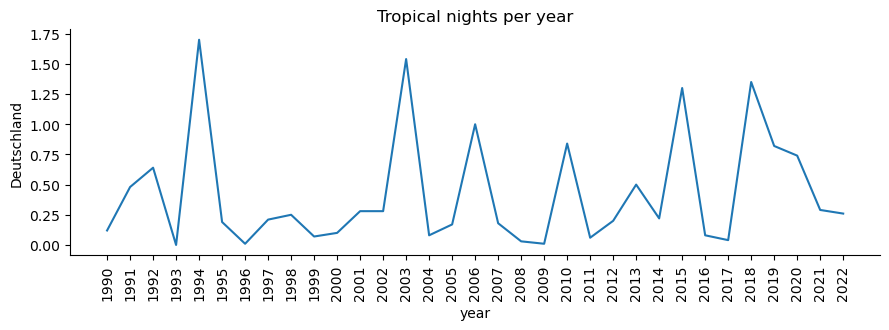

In [40]:
# total fires per year
sns.relplot(data = total_fires.iloc[:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Total fires per year")

# total burnt area per year
sns.relplot(data = total_area.iloc[:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Total burnt area (ha) per year")

# avg air temp per year in germany
sns.relplot(data = mean_temp.iloc[108:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Average air temperature")

# avg precipitation per year - Annual regional averages of precipitation height (annual sum) in mm
sns.relplot(data = mean_rain.iloc[108:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Average precipitation per year")

# summer days
sns.relplot(data = summer_days.iloc[38:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Summer days per year")

# hot days
sns.relplot(data = hot_days.iloc[38:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Hot days per year")

# tropical nights
sns.relplot(data = tropical_nights.iloc[38:, -1], kind = "line", height = 3, aspect = 3);
plt.xticks(rotation=90)
plt.title("Tropical nights per year")
plt.show()

Now we're getting the data for causes of wildfires

In [41]:
def get_dataframe(counties, urls):
  counties_df = {}

  for url, county in zip(urls, counties):                                           # we loop over the two lists
      try:
          response = requests.get(url)                                              # first we check the url is accessible
          if response.status_code == 200:
              print(f"URL '{url}' is accessible.")
          else:
              print(f"URL '{url}' returned status code: {response.status_code}")
              continue  # Skip processing this URL
      except requests.exceptions.RequestException as e:
          print(f"An error occurred while fetching '{url}': {str(e)}")
          continue  # Skip processing this URL

      path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]                 # this will help us extract the data from the url

      try:                                                                          # now we try to read the CSV
          county_df = pd.read_csv(path)
          counties_df[county] = county_df                                           # we store the data frame with the name of it's county
          print(f"DataFrame for '{county}' created and stored.")                    # print the info of each data frame to check the data types, the null values, etc.
          print(county_df.info())
      except Exception as e:
          print(f"An error occurred while reading CSV for '{county}': {str(e)}")

  # we need to create a new for loop to add the column 'county'
  # first we create a list with the names of the counties

  county_names = ['Baden Wurttemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Lower Saxony', 'Mecklenburg-Vorpommern', 'Nordrhein-Westfalen',
                  'Rhineland-Palatinate', 'Saarland', 'Saxony Anhalt', 'Saxony', 'Schleswig-Holstein', 'Thuringia', 'Germany']

  for county, county_df in counties_df.items():
      county_df['county'] = county_names[counties.index(county)]

  # List of DataFrames to concatenate
  dfs_to_concat = list(counties_df.values())

  # Concatenate DataFrames by columns
  df = pd.concat(dfs_to_concat, axis=0)

  # Display the concatenated DataFrame
  return(df)

In [42]:
urls = ['https://drive.google.com/file/d/1XOtkE9bGdTZOnk1hOYrxhTk2wr_RZiYf/view?usp=sharing', # Baden Wurttemberg
        'https://drive.google.com/file/d/1QMpYn07SFz_oI9fLd0lHJbkxQ1SqFJXh/view?usp=sharing', # Bavaria
        'https://drive.google.com/file/d/1vYFnCHWWKVZx-ltmchrEGdc2MDbfRPoP/view?usp=sharing', # Berlin
        'https://drive.google.com/file/d/1qAwEcYvIEZdH8Nd3cml6quXZ48Mjyfwa/view?usp=sharing', # Brandenburg
        'https://drive.google.com/file/d/1d-zZXRR95o7hjX1CygR0xTzfJbht8X88/view?usp=sharing', # Bremen
        'https://drive.google.com/file/d/1PP19gP05_fy1UG7A-SKv9VMJ8M8QmSHy/view?usp=sharing', # Hamburg
        'https://drive.google.com/file/d/1eL074j9ayOmaU3oLwDUJLT1AIxzMoYc_/view?usp=sharing', # Hessen
        'https://drive.google.com/file/d/1yjYoSfPYuU72V1uNSi3jF56Iy_ARvS4C/view?usp=sharing', # Lower Saxony
        'https://drive.google.com/file/d/1g41DbxgTtQxdf3s22HKG9hiaPPpE51sr/view?usp=sharing', # Mecklenburg-Vorpommern
        'https://drive.google.com/file/d/1nahWCkaLC4CFTgVQ0-39ilFyoiZu29oj/view?usp=sharing', # Nordrhein-Westfalen
        'https://drive.google.com/file/d/1VBS-dh1hbGzoy_DroFqWdjVxYc1aCQLp/view?usp=sharing', # Rhineland-Palatinate
        'https://drive.google.com/file/d/1zSTBy9KFy2BddeLstHFgK_9CLTyGnOhl/view?usp=sharing', # Saarland
        'https://drive.google.com/file/d/1SLDrGVHuDJA8shBhnwoDNWUUPvqbdc87/view?usp=sharing', # Saxony Anhalt
        'https://drive.google.com/file/d/1COWUmCfid2SxD7sK5w6Nn3rSw0DZAJCt/view?usp=sharing', # Saxony
        'https://drive.google.com/file/d/1wHUfyoGyuWnFHSwY7NrEF9so5MV0TG1_/view?usp=sharing', # Schleswig-Holstein
        'https://drive.google.com/file/d/1yrcueVIyovljV0nPS2w8Xh-ZNhpPLWvX/view?usp=sharing', # Thuringia
        'https://drive.google.com/file/d/1qUS59Tgi5fgJIPKWnWT3smf6edx13O9B/view?usp=sharing'] # Germany

counties = ['causes_baden_wurtt', 'causes_bavaria', 'causes_berlin', 'causes_brandenburg', 'causes_bremen', 'causes_hamburg', 'causes_hessen', 'causes_lower_sax',
            'causes_meck_vor', 'causes_nordrhein_west', 'causes_rhein_pal', 'causes_saarland', 'causes_sax_ahn', 'causes_saxony', 'causes_schleswig_holstein',
            'causes_thuringia', 'causes_germany']

fire_causes = get_dataframe(counties, urls)
fire_causes

URL 'https://drive.google.com/file/d/1XOtkE9bGdTZOnk1hOYrxhTk2wr_RZiYf/view?usp=sharing' is accessible.
DataFrame for 'causes_baden_wurtt' created and stored.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cause            65 non-null     object
 1   year             65 non-null     int64 
 2   burnt_area (ha)  65 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB
None
URL 'https://drive.google.com/file/d/1QMpYn07SFz_oI9fLd0lHJbkxQ1SqFJXh/view?usp=sharing' is accessible.
DataFrame for 'causes_bavaria' created and stored.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cause            65 non-null     object
 1   year             65 non-null     int64 
 2   burnt_area (ha)  

,cause,year,burnt_area (ha),county
0,negligence,2010,5.0,Baden Wurttemberg
1,natural causes,2010,0.0,Baden Wurttemberg
2,other action-related effects,2010,0.0,Baden Wurttemberg
3,unknown causes,2010,2.0,Baden Wurttemberg
4,intentional,2010,0.0,Baden Wurttemberg
...,...,...,...,...
60,negligence,2022,319.0,Germany
61,natural causes,2022,8.0,Germany
62,other action-related effects,2022,339.0,Germany
63,unknown causes,2022,1290.0,Germany


In [43]:
#from google.colab import files

#fire_causes.to_csv('fire_causes.csv', index=False)
#files.download('fire_causes.csv')

In [44]:
# now the cases of negligence in detail per year

urls = ['https://drive.google.com/file/d/1bdcDkZDEvg4SGD_oczY38oMmMpgzY14f/view?usp=sharing', # Baden Wurttemberg
        'https://drive.google.com/file/d/1_2TNQ_x9x1u0kzXRGmfnjLISChZp0RGo/view?usp=sharing', # Bavaria
        'https://drive.google.com/file/d/1MhtfEYD99xzPNn8SQ1oM_qWMDFVW7r1k/view?usp=sharing', # Berlin
        'https://drive.google.com/file/d/1jeUf_JQkUWEjCmGZUzQn4xhvos0kzjmp/view?usp=sharing', # Brandenburg
        'https://drive.google.com/file/d/1MykjtPLTxG24u0otqrvhu8zZxyC4c6GL/view?usp=sharing', # Bremen
        'https://drive.google.com/file/d/1oid13bezC0Lp2bMExKhibqxHA0WAeXZR/view?usp=sharing', # Hamburg
        'https://drive.google.com/file/d/1xv8KjNxAHemOiYT6Qvl7jRVvpEyF4QRx/view?usp=sharing', # Hessen
        'https://drive.google.com/file/d/1wNTqcmaDy7xIh4L4ApMJEFM6t0oG-rt8/view?usp=sharing', # Lower Saxony
        'https://drive.google.com/file/d/1dOs2tc7mEBpItW_TwvQx8OwqQHV0YzUS/view?usp=sharing', # Mecklenburg-Vorpommern
        'https://drive.google.com/file/d/1Wm0dFHAR2HzU2UIkb6CH9HnI9au7QC2s/view?usp=sharing', # Nordrhein-Westfalen
        'https://drive.google.com/file/d/14BYmkkbrKLyig65rIgEJaXqGkHWLJ2A1/view?usp=sharing', # Rhineland-Palatinate
        'https://drive.google.com/file/d/126MGfWuFluT4lCP7znx11ZkNanA5_79O/view?usp=sharing', # Saarland
        'https://drive.google.com/file/d/1fAduJE05MVpW8fEbqYWJqqk0n4ci8rw_/view?usp=sharing', # Saxony Anhalt
        'https://drive.google.com/file/d/1kQxNx4xSn_aiadFxK31WITqYhyOxQIDN/view?usp=sharing', # Saxony
        'https://drive.google.com/file/d/1pIny8ziMLGzX5KVvxphIwTE2R-x8b9d1/view?usp=sharing', # Schleswig-Holstein
        'https://drive.google.com/file/d/1kfsFQFxvmFRhysCxY4AZiVliTereUHpg/view?usp=sharing', # Thuringia
        'https://drive.google.com/file/d/1UeymK96ENl2yCwascIhGPrFrxXYO12Xm/view?usp=sharing'] # Germany

counties = ['negligence_baden_wurtt', 'negligence_bavaria', 'negligence_berlin', 'negligence_brandenburg', 'negligence_bremen', 'negligence_hamburg', 'negligence_hessen',
            'negligence_lower_sax', 'negligence_meck_vor', 'negligence_nordrhein_west', 'negligence_rhein_pal', 'negligence_saarland', 'negligence_sax_ahn',
            'negligence_saxony', 'negligence_schleswig_holstein', 'negligence_thuringia', 'negligence_germany']

negligence = get_dataframe(counties, urls)
negligence

URL 'https://drive.google.com/file/d/1bdcDkZDEvg4SGD_oczY38oMmMpgzY14f/view?usp=sharing' is accessible.
DataFrame for 'negligence_baden_wurtt' created and stored.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cause            72 non-null     object
 1   year             72 non-null     int64 
 2   burnt_area (ha)  72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB
None
URL 'https://drive.google.com/file/d/1_2TNQ_x9x1u0kzXRGmfnjLISChZp0RGo/view?usp=sharing' is accessible.
DataFrame for 'negligence_bavaria' created and stored.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cause            72 non-null     object
 1   year             72 non-null     int64 
 2   burnt_are

,cause,year,burnt_area (ha),county
0,"General public (campers, other visitors, child...",2010,1,Baden Wurttemberg
1,"General public (campers, other visitors, child...",2011,2,Baden Wurttemberg
2,"General public (campers, other visitors, child...",2012,1,Baden Wurttemberg
3,"General public (campers, other visitors, child...",2013,0,Baden Wurttemberg
4,"General public (campers, other visitors, child...",2014,0,Baden Wurttemberg
...,...,...,...,...
73,Other\n,2018,4,Germany
74,Other\n,2019,4,Germany
75,Other\n,2020,7,Germany
76,Other\n,2021,2,Germany


In [45]:
#negligence.to_csv('negligence.csv', index=False)
#files.download('negligence.csv')

In [46]:
# we see we need to clean the tables a bit

fire_causes.groupby(['county', 'cause']).agg({'burnt_area (ha)': 'sum'})

burnt_area (ha)
county            cause                                        
Baden Wurttemberg intentional                              18.0
                  natural causes                           10.0
                  negligence                               50.0
                  other action-related effects              9.0
                  unknown causes                           41.0
...                                                         ...
Thuringia         intentional                               0.0
                  natural causes                            1.0
                  negligence                               29.0
                  other action-related effects              1.0
                  unknown causes                           57.0

[85 rows x 1 columns]

In [47]:
# first we need to change Fahrlässigkeit to negligence

fire_causes['cause'] = fire_causes['cause'].replace('Fahrlässigkeit', 'negligence')

In [48]:
fire_causes.groupby('cause').sum('burnt_area')

,year,burnt_area (ha)
cause,,
intentional,445536,3562.000
natural causes,445536,383.000
negligence,445536,2913.000
other action-related effects,445536,5269.000
unknown causes,445536,9165.037


In [49]:
negligence.groupby('cause').sum('burnt_area')

,year,burnt_area (ha)
cause,,
Agricultural activities\n,26208,332
"Communication (railway, electrical lines)\n",24198,99
"Communication (railway, electrical lines) \n",2010,3
"General public (campers, other visitors, children)",50401,807
Industrial activities,340717,20
Timber harvesting and other forestry activities,26208,71
Agricultural activities,387088,320
"Communication (railway, electrical lines)",266123,55
"Communication (railway, electrical lines)",96772,46


In [50]:
# now we have to remove '\n' from the cause column

negligence['cause'] = negligence['cause'].str.replace('\n', '')

# we also have other problems with the cause column maybe - we see values that are repeated so maybe we need strip to remove whitespaces
negligence['cause'] = negligence['cause'].str.strip()

# and we have some values with 'Kommunikation (Eisenbahn, elektrische Leitungen)'
negligence['cause'] = negligence['cause'].replace('Kommunikation (Eisenbahn, elektrische Leitungen)', 'Communication (railway, electrical lines)')

In [51]:
negligence.groupby('cause').sum('burnt_area')

,year,burnt_area (ha)
cause,,
Agricultural activities,413296,652
"Communication (railway, electrical lines)",413296,204
"General public (campers, other visitors, children)",413296,1566
Industrial activities,413296,23
Other,413296,194
Timber harvesting and other forestry activities,413296,140


In [52]:
fire_causes.head(5)

,cause,year,burnt_area (ha),county
0,negligence,2010,5.0,Baden Wurttemberg
1,natural causes,2010,0.0,Baden Wurttemberg
2,other action-related effects,2010,0.0,Baden Wurttemberg
3,unknown causes,2010,2.0,Baden Wurttemberg
4,intentional,2010,0.0,Baden Wurttemberg


In [53]:
negligence.head(5)

,cause,year,burnt_area (ha),county
0,"General public (campers, other visitors, child...",2010,1,Baden Wurttemberg
1,"General public (campers, other visitors, child...",2011,2,Baden Wurttemberg
2,"General public (campers, other visitors, child...",2012,1,Baden Wurttemberg
3,"General public (campers, other visitors, child...",2013,0,Baden Wurttemberg
4,"General public (campers, other visitors, child...",2014,0,Baden Wurttemberg


In [54]:
negligence.groupby(['cause', 'year']).sum()[['burnt_area (ha)']]

burnt_area (ha)
cause                                           year                 
Agricultural activities                         2010               44
                                                2011                0
                                                2012                6
                                                2013                6
                                                2014                4
...                                                               ...
Timber harvesting and other forestry activities 2018               12
                                                2019               13
                                                2020                8
                                                2021                6
                                                2022               32

[78 rows x 1 columns]

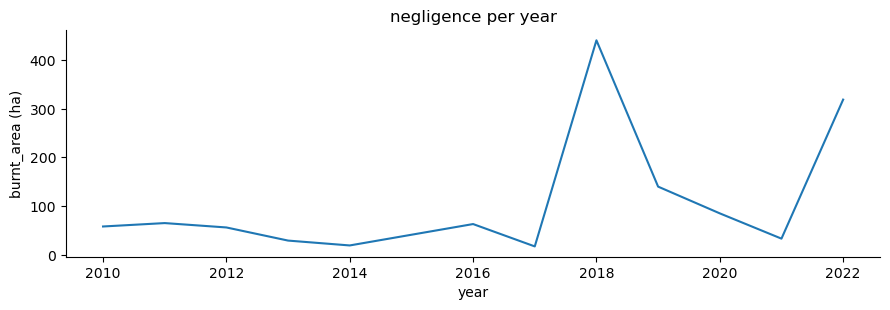

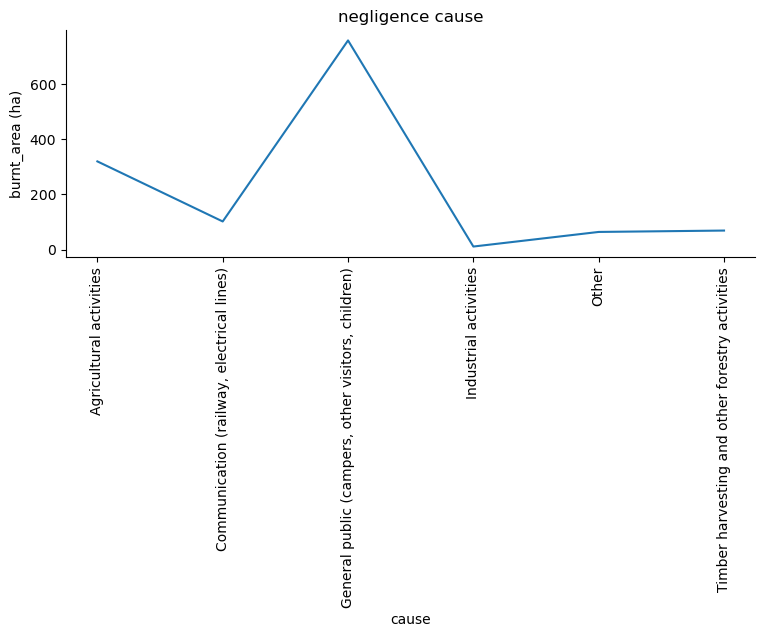

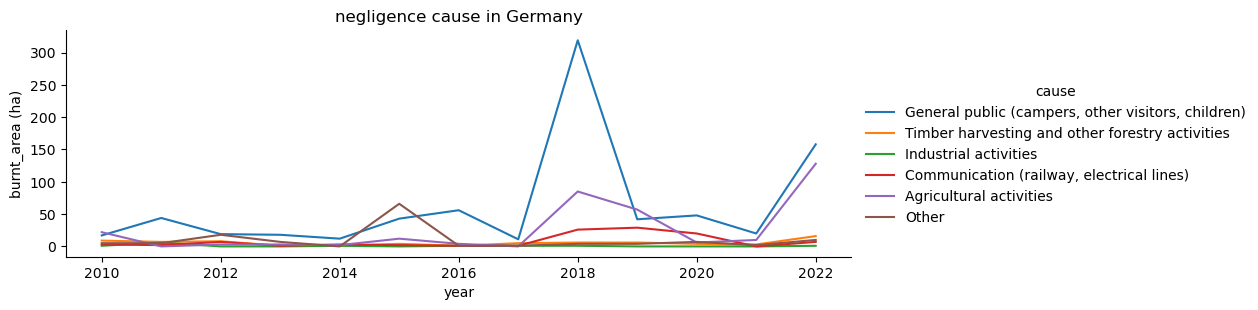

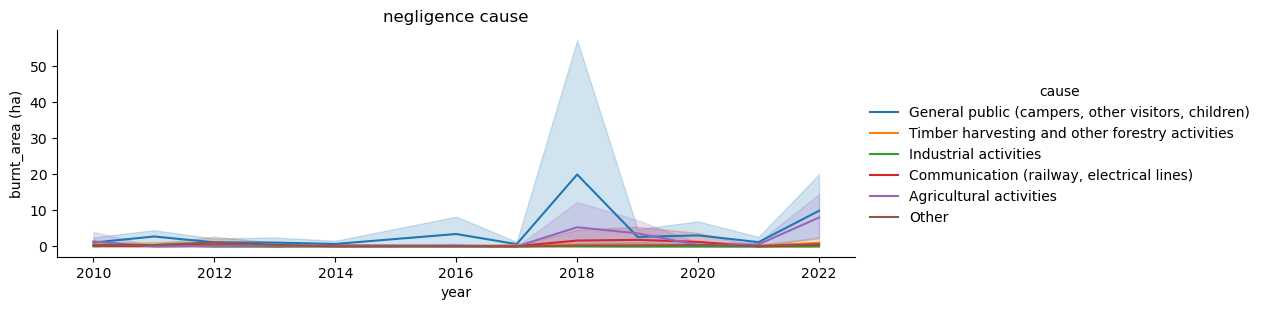

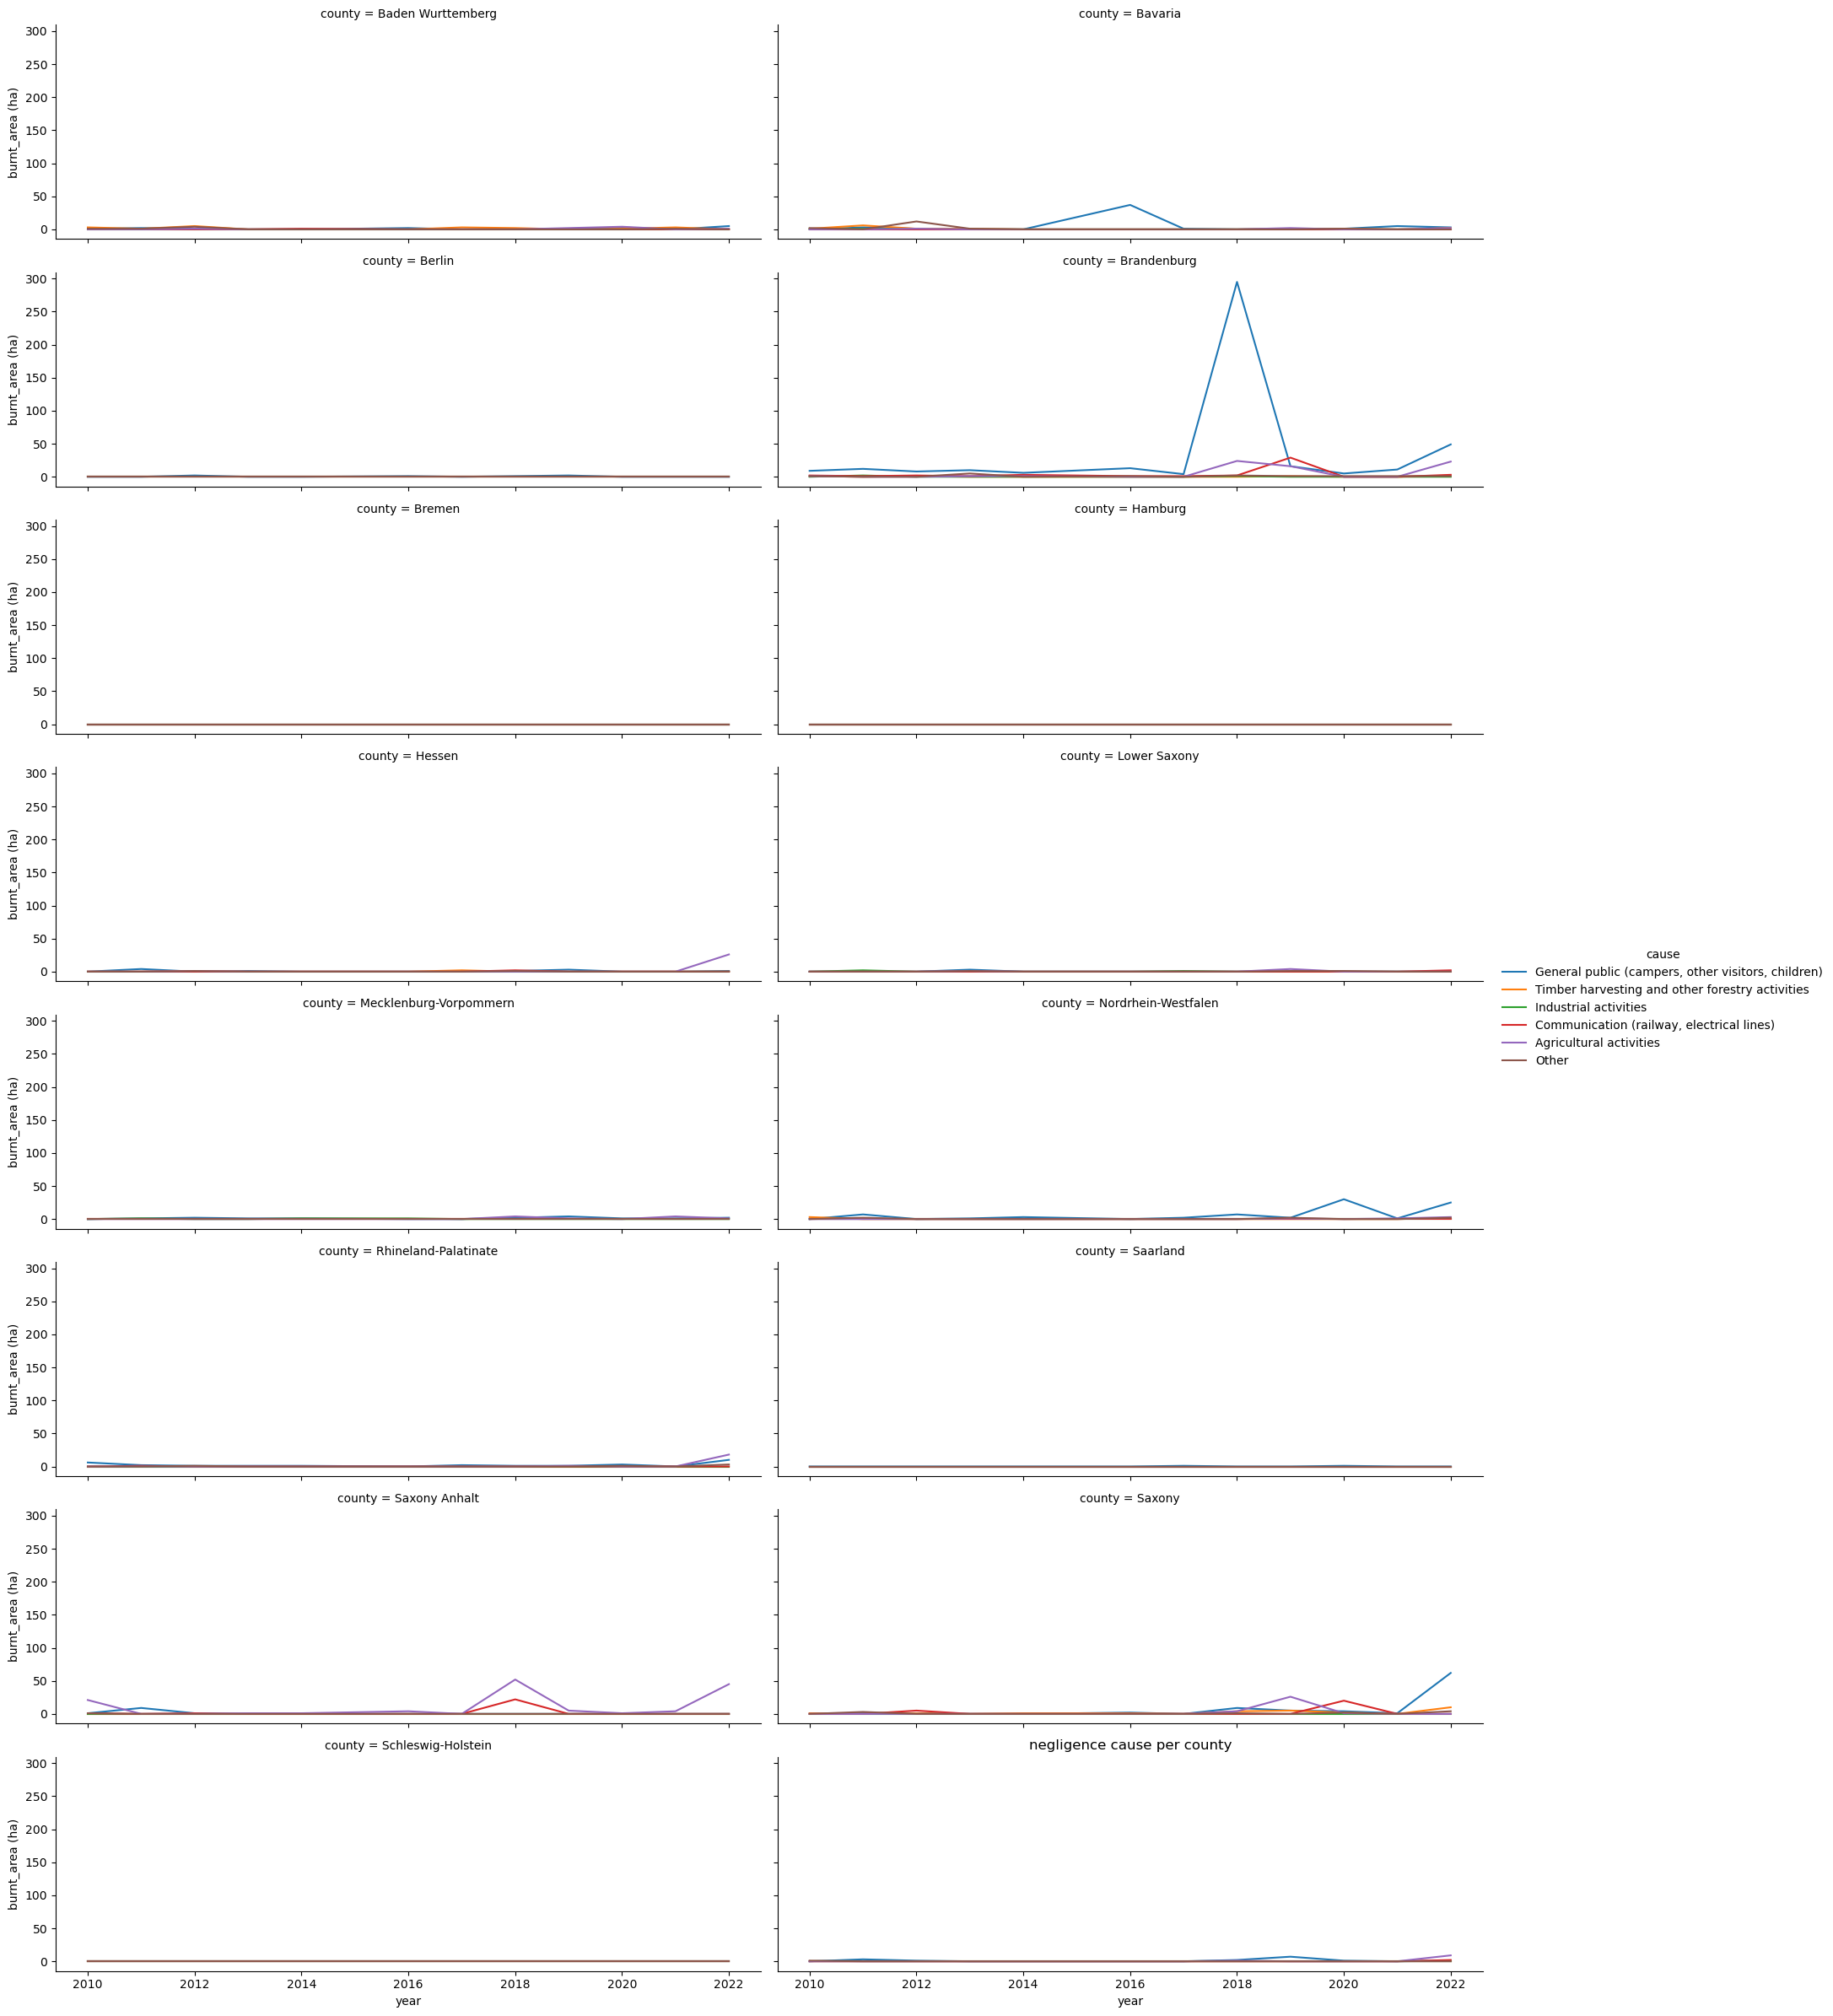

In [55]:
# negligence per year
sns.relplot(data = negligence.query('county != "Germany"').groupby('year').sum(), x = 'year', y = 'burnt_area (ha)', kind = "line", height = 3, aspect = 3);
plt.xticks(rotation = 0)
plt.title("negligence per year");

sns.relplot(data = negligence.query('county != "Germany"').groupby(['cause']).sum()[['burnt_area (ha)']], x = 'cause', y = 'burnt_area (ha)', kind = "line", height = 3, aspect = 3);
plt.xticks(rotation = 90)
plt.title("negligence cause");

sns.relplot(data = negligence.query('county == "Germany"'), x = 'year', y = 'burnt_area (ha)', hue = 'cause', kind = "line", height = 3, aspect = 3);
plt.xticks(rotation = 0)
plt.title("negligence cause in Germany");

sns.relplot(data = negligence.query('county != "Germany"'), x = 'year', y = 'burnt_area (ha)', hue = 'cause', kind = "line", height = 3, aspect = 3);
plt.xticks(rotation = 0)
plt.title("negligence cause");

sns.relplot(data = negligence.query('county != "Germany"'), x = 'year', y = 'burnt_area (ha)', hue = 'cause', col = 'county', col_wrap = 2, kind = "line", height = 3, aspect = 3);
plt.xticks(rotation = 0)
plt.title("negligence cause per county");

plt.show()